In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


https://www.kaggle.com/datasets/amitvkulkarni/impact-of-product-positioning-on-sales

* Product Position: Describes the location within the store where the product is placed, such as "Front of Store," "End-cap," or "Aisle."
* Price: Indicates the price of the product.
* Competitor's Price: Specifies the price of similar products offered by competitors.
* Promotion: Indicates whether the product is part of a promotional campaign, with values "Yes" or "No."
* Foot Traffic: Represents the level of foot traffic in the vicinity of the product's location, categorized as "High," "Medium," or "Low."
* Consumer Demographics: Describes the characteristics of the consumers purchasing the product, such as "Young adults," "Families," "Seniors," or "College students."
* Product Category: Specifies the category to which the product belongs, such as "Food," "Electronics," or "Clothing."
* Seasonal: Indicates whether the product is seasonal, with values "Yes" or "No."
* Sales Volume: Represents the number of units of the product sold within a specific time period.

In [3]:
data = pd.read_csv('Data/Product Positioning.csv')
data.head()

,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942


In [4]:
data.shape

(1000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             1000 non-null   int64  
 1   Product Position       1000 non-null   object 
 2   Price                  1000 non-null   float64
 3   Competitor's Price     1000 non-null   float64
 4   Promotion              1000 non-null   object 
 5   Foot Traffic           1000 non-null   object 
 6   Consumer Demographics  1000 non-null   object 
 7   Product Category       1000 non-null   object 
 8   Seasonal               1000 non-null   object 
 9   Sales Volume           1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB


In [6]:
data.duplicated().any()

False

In [7]:
data.describe()

,Product ID,Price,Competitor's Price,Sales Volume
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,154899.862000,28.020010,25.550110,1769.311000
std,25795.563607,13.067876,13.156466,718.386603
min,110033.000000,5.060000,0.720000,507.000000
25%,133164.500000,16.917500,14.277500,1136.500000
50%,154694.500000,28.680000,26.145000,1791.500000
75%,176954.250000,39.332500,37.125000,2363.750000
max,199976.000000,49.980000,49.850000,2999.000000


In [8]:
for col in data.select_dtypes('object').columns:
    print(f'unique values in {col}: ',data[col].unique())

unique values in Product Position:  ['Aisle' 'End-cap' 'Front of Store']
unique values in Promotion:  ['No' 'Yes']
unique values in Foot Traffic:  ['Medium' 'Low' 'High']
unique values in Consumer Demographics:  ['Families' 'Seniors' 'Young adults' 'College students']
unique values in Product Category:  ['Clothing' 'Electronics' 'Food']
unique values in Seasonal:  ['No' 'Yes']


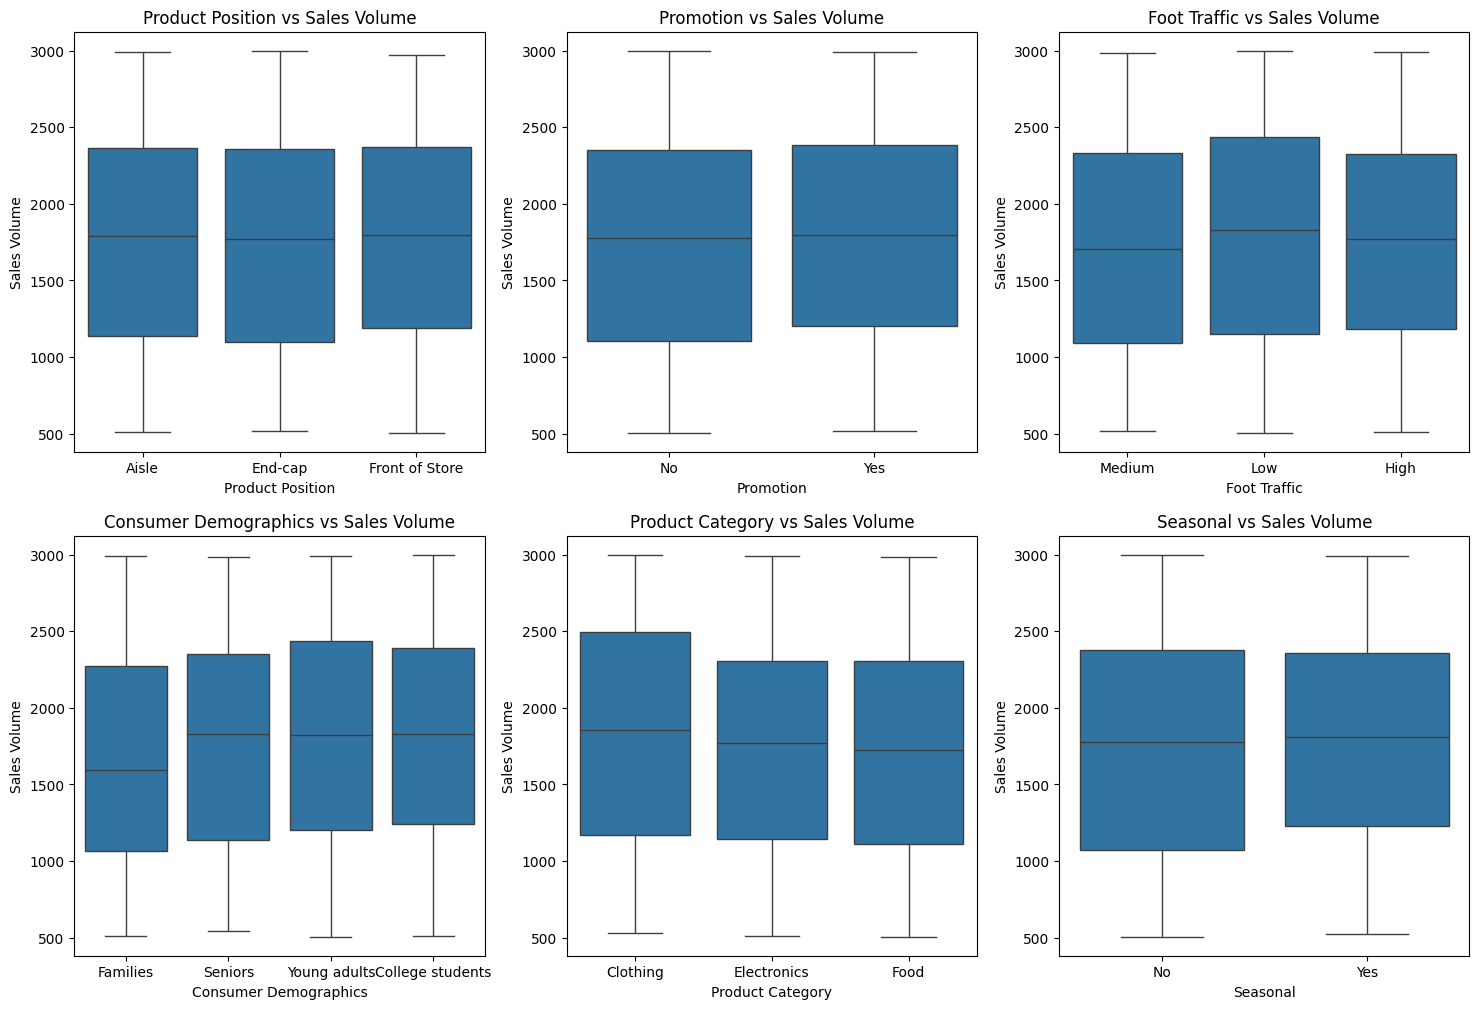

In [9]:
plt.figure(figsize=(18,12))
for i,col in enumerate(data.select_dtypes('object').columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=data[col],y=data['Sales Volume'])
    plt.title(f'{col} vs Sales Volume')

In [10]:
sales_by_category_position = data.groupby(['Product Category','Product Position'])['Sales Volume'].sum().reset_index()
sales_by_category_position

,Product Category,Product Position,Sales Volume
0,Clothing,Aisle,205272
1,Clothing,End-cap,215166
2,Clothing,Front of Store,198142
3,Electronics,Aisle,208371
4,Electronics,End-cap,205724
5,Electronics,Front of Store,173422
6,Food,Aisle,191827
7,Food,End-cap,179027
8,Food,Front of Store,192360


Product Position        Aisle      End-cap  Front of Store
Product Category                                          
Clothing          1832.785714  1749.317073     1923.708738
Electronics       1780.948718  1728.773109     1734.220000
Food              1728.171171  1790.270000     1672.695652


Promotion                  No          Yes
Product Category                          
Clothing          1869.095745  1781.266667
Electronics       1725.598837  1772.646341
Food              1676.988095  1781.518987


Foot Traffic             High          Low       Medium
Product Category                                       
Clothing          1770.293103  1931.869565  1785.616822
Electronics       1780.491228  1729.535088  1734.944444
Food              1725.781818  1736.354839  1722.739837


Consumer Demographics  College students     Families     Seniors  Young adults
Product Category                                                              
Clothing                    1879.870968  1803.

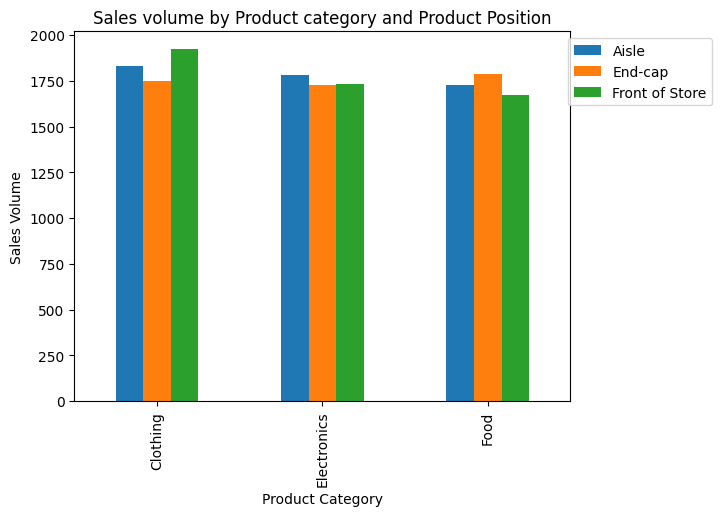

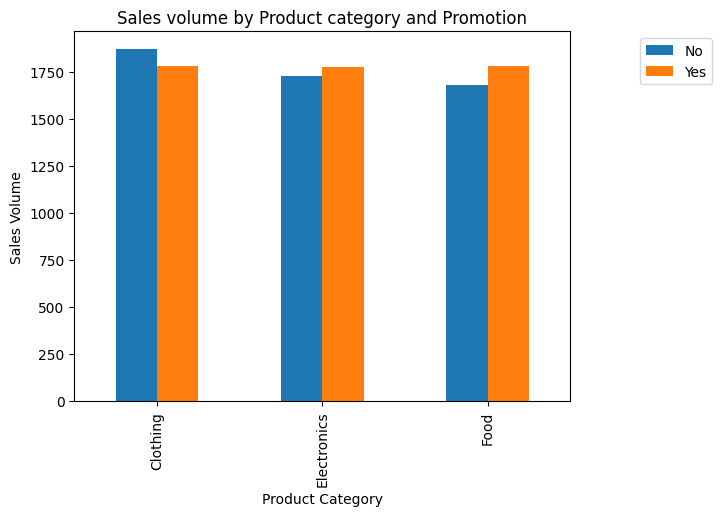

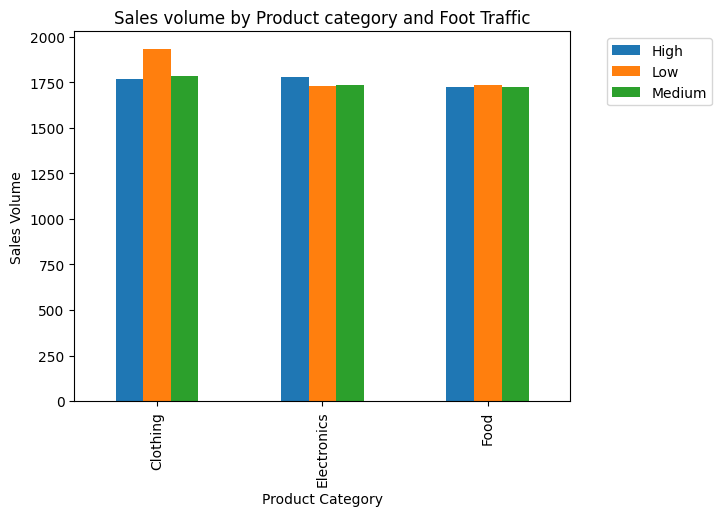

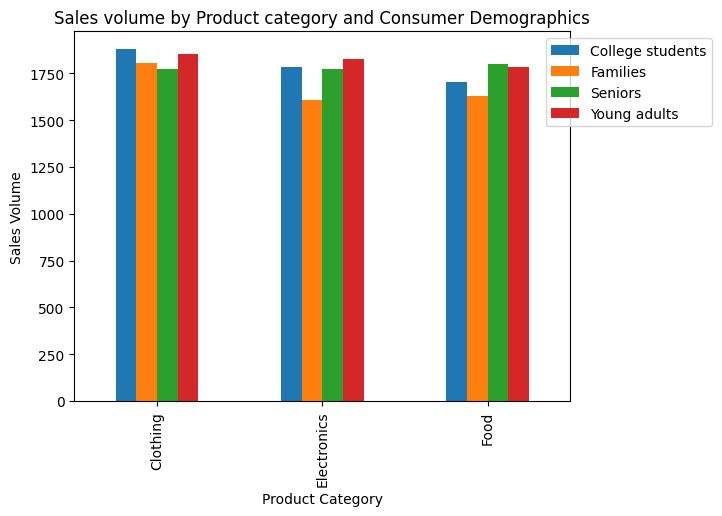

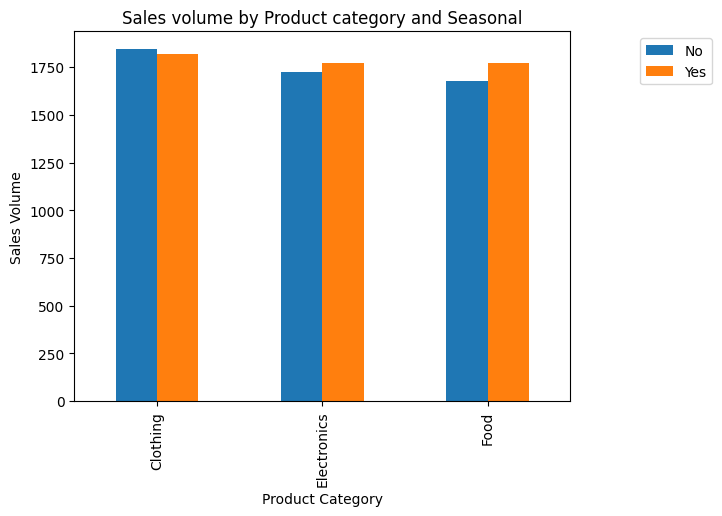

In [11]:
for col in data.select_dtypes('object').columns:
    if col != 'Product Category':
        a = data.pivot_table(index='Product Category', columns= col, values='Sales Volume')
        print(a)
        print('\n')
        a.plot(kind='bar')
        plt.ylabel('Sales Volume')
        plt.legend(bbox_to_anchor=(1.3,1))
        plt.title(f'Sales volume by Product category and {col}')
    else:
        pass


https://www.kaggle.com/code/subhendudharua/impact-of-product-positioning-on-sales-volume
1-Product Position:

For each product category, the average sales volume varies slightly across different product positions. For example, for Clothing, the average sales volume is highest at 'Front of Store' (1923.71) and lowest at 'End-cap' (1749.32).
This suggests that product position may have some impact on sales volume, with certain positions potentially attracting more customers or generating more sales.
2- Promotion:

The average sales volume varies between 'No' and 'Yes' promotions across different product categories. However, the differences are not consistent across categories.
For example, in the Clothing category, the average sales volume is slightly higher when there is no promotion ('No': 1869.10) compared to when there is a promotion ('Yes': 1781.27).
This indicates that the impact of promotion on sales volume may vary depending on the product category.
3- Foot Traffic:


Average sales volume varies slightly across different levels of foot traffic for each product category. However, the differences are not very pronounced.
For example, in the Clothing category, the average sales volume is highest for 'Low' foot traffic (1931.87) and lowest for 'Medium' foot traffic (1785.62).
This suggests that foot traffic may have some influence on sales volume, but the effect is not consistent across categories. Consumer Demographics:
4- Consumer Demographics:

Average sales volume varies across different consumer demographics within each product category. For example, in the Clothing category, the average sales volume is highest for 'College students' (1879.87) and lowest for 'Families' (1803.91).
This indicates that different consumer demographics may have different purchasing behaviors, influencing sales volume in various product categories. Seasonal:
5- Seasonal:

Average sales volume shows some variation between seasons within each product category. However, the differences are not substantial.
For example, in the Clothing category, the average sales volume is slightly higher during the 'No' seasonal period (1844.63) compared to the 'Yes' seasonal period (1817.08).
This suggests that seasonal factors may have a minor impact on sales volume, but it may not be significant in all product categories.
Overall, this analysis provides insights into how different categorical variables may influence sales volume in various product categories. However, further analysis or hypothesis testing may be needed to determine the significance of these relationships.
 

https://github.com/thiamfook/streamlit-groupbar/blob/main/app.py

 price of clothing products , seasonal == no, promotion == yes 
 x price
 y position

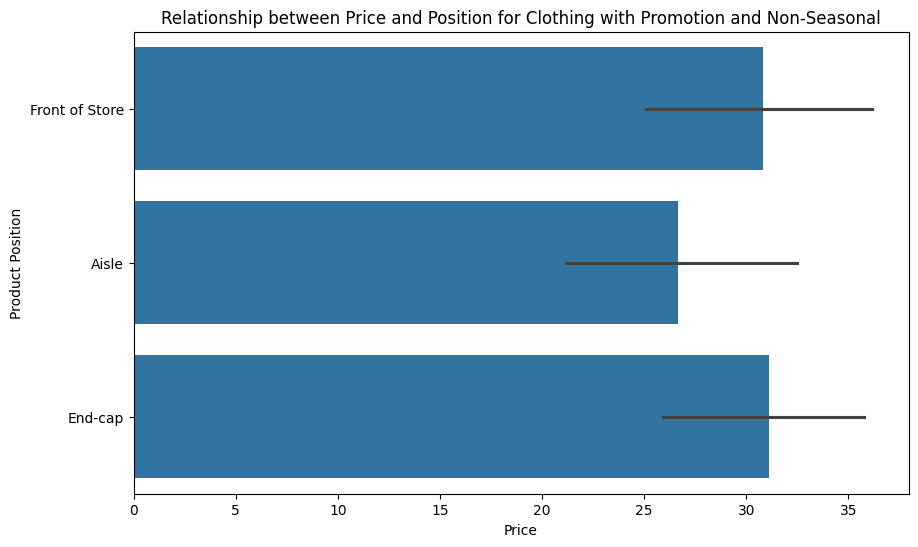

In [12]:
filtered_data = data[(data['Product Category']=='Clothing')&
                     (data['Promotion']=='Yes')&
                     (data['Seasonal']=='No')&
                     (data['Product Position'])]
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='Price', y='Product Position')
plt.title('Relationship between Price and Position for Clothing with Promotion and Non-Seasonal')
plt.xlabel('Price')
plt.ylabel('Product Position')

plt.show()

In [13]:
filtered_data_a = data[
                     (data['Promotion']=='Yes')]
pivot_df = filtered_data_a.pivot_table(index='Product ID', columns='Product Category', values='Price', fill_value=0)
pivot_df 

Product Category,Clothing,Electronics,Food
Product ID,,,
110033,0.00,40.15,0.00
110075,0.00,42.96,0.00
110220,0.00,48.11,0.00
110276,0.00,0.00,34.75
110295,0.00,13.10,0.00
...,...,...,...
198924,22.87,0.00,0.00
199194,0.00,0.00,8.58
199233,13.99,0.00,0.00


In [16]:
fil = data[(data['Product Category']=='Clothing')&
           (data['Product Position']=='Front of Store')]

sales_by_category_position = fil.groupby(['Product Category','Product Position'])['Sales Volume'].sum().reset_index()
sales_by_category_position

,Product Category,Product Position,Sales Volume
0,Clothing,Front of Store,198142


In [19]:
# Calculate the total sales volume of 'front of store' products
total_front_of_store_sales = sales_by_category_position[sales_by_category_position['Product Position'] == 'front of store']['Sales Volume'].sum()

# Calculate the percentage of sales volume for each product position
sales_by_category_position['Sales Volume (%)'] = (sales_by_category_position['Sales Volume'] / total_front_of_store_sales) * 100
sales_by_category_position

,Product Category,Product Position,Sales Volume,Sales Volume (%)
0,Clothing,Front of Store,198142,inf


In [18]:
print(sales_by_category_position['Sales Volume'])

0    198142
Name: Sales Volume, dtype: int64


In [21]:
# Filter the data for the 'Clothing' category
fil = data[data['Product Category'] == 'Clothing']

# Calculate the total sales volume for each product position within the 'Clothing' category
sales_by_category_position = fil.groupby(['Product Category', 'Product Position'])['Sales Volume'].sum().reset_index()

# Calculate the total sales volume of 'front of store' products
total_front_of_store_sales = sales_by_category_position[sales_by_category_position['Product Position'] == 'front of store']['Sales Volume'].sum()

# Calculate the percentage of sales volume for each product position
sales_by_category_position['Sales Volume (%)'] = 0  # Initialize the column
if total_front_of_store_sales != 0:
    sales_by_category_position['Sales Volume (%)'] = (sales_by_category_position['Sales Volume'] / total_front_of_store_sales) * 100

# Display the resulting DataFrame
sales_by_category_position

,Product Category,Product Position,Sales Volume,Sales Volume (%)
0,Clothing,Aisle,205272,0
1,Clothing,End-cap,215166,0
2,Clothing,Front of Store,198142,0


In [23]:
# Filter the data for the 'Clothing' category
fil = data[data['Product Category'] == 'Clothing']

# Calculate the total sales volume of 'front of store' products
total_front_of_store_sales = fil[fil['Product Position'] == 'Front of Store']['Sales Volume'].sum()

# Calculate the percentage of sales volume for each product position
fil['Sales Volume (%)'] = (fil['Sales Volume'] / total_front_of_store_sales) * 100

# Display the resulting DataFrame
print(fil)

     Product ID Product Position  Price  Competitor's Price Promotion  \
0        185102            Aisle  17.07               16.16        No   
1        188771            Aisle  17.41               13.13        No   
3        112917            Aisle  42.26               38.98       Yes   
4        192936          End-cap  47.94               45.59        No   
5        117590          End-cap  34.50               34.34        No   
..          ...              ...    ...                 ...       ...   
981      184596            Aisle  41.83               37.17       Yes   
984      154931            Aisle  31.27               28.47       Yes   
986      129854          End-cap  13.36               12.36        No   
990      180566            Aisle  33.32               32.90       Yes   
994      121303   Front of Store  24.35               23.42       Yes   

    Foot Traffic Consumer Demographics Product Category Seasonal  \
0         Medium              Families         Clothing

C:\Users\antoa\AppData\Local\Temp\ipykernel_15384\2316362987.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil['Sales Volume (%)'] = (fil['Sales Volume'] / total_front_of_store_sales) * 100
